# TP 8 Distribution Gaussienne
Dans ce TP, nous aimerions explorer le classifieur base sur les distributions gaussiennnes pour une classification binaire.



# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.metrics import f1_score
from matplotlib import cm

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
from google.colab import drive as drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# données
X = np.genfromtxt('/content/gdrive/My Drive/TP/TP8/X.csv', delimiter=',', dtype=float)
X.shape

(307, 2)

In [ ]:
# données
Xval = np.genfromtxt('/content/gdrive/My Drive/TP/TP8/Xval.csv', delimiter=',', dtype=float)
Xval .shape

(307, 2)

In [ ]:
# données
yval = np.genfromtxt('/content/gdrive/My Drive/TP/TP8/yval.csv', delimiter=',', dtype=float)
yval.shape

(307,)

Dans ces données (data), les 2 premières colonnes representent les caracteristiques de l'ensemble d'entrainement.

Chaque ligne represente un exemple de notre ensemble de données. 


# Entrainement 
dans cette partie nous allons calculer les parametres de la disribution gaussienne de chaque caracteristique.

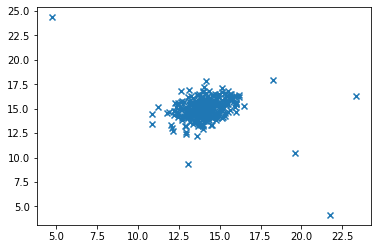

In [ ]:
plt.scatter(X[:,0],X[:,1], marker ='x')

Mettons un lien avec ce que nous avons appris en regression linéaire

In [ ]:
def moy(X):
    return np.mean(X,axis=0)
moy(X)
def var(X):
    return np.var(X,axis=1)
var(X)

def calculParam(X):
    mu=np.mean(X,axis=0)
    var=np.var(X,axis=0)
    
    return mu,var

calculParam(X)

(array([14.11225277, 14.99767459]), array([1.8326777 , 1.70971534]))

In [ ]:
mu = moy(X)
v=var(X) 
np.pi*v
np.exp(0)

1.0

In [ ]:
p=1/np.sqrt(2*np.pi*v)
p

array([0.2946911 , 0.30510418])

In [ ]:
def calculProba(X,mu,var):
    p = 1/(np.sqrt(2*np.pi*var*var))
    e = np.exp(-((X-mu)*(X-mu)/2*v*v))
    return e*p

In [ ]:
prob = calculProba(X, mu, v)

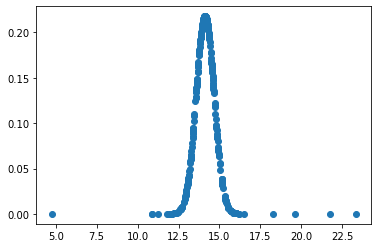

In [ ]:
plt.scatter(X[:,0],prob[:,0])

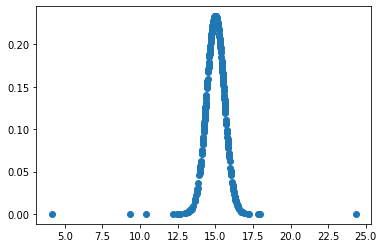

In [ ]:
plt.scatter(X[:,1],prob[:,1])

In [ ]:
f1_scores = {}
proba_nomulti = calculProba(Xval, mu, v)
yproba = proba_nomulti[:,0]*proba_nomulti[:,1]
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    f1_scores[epsilon]= f1_score(yval, y_pred)

In [ ]:
print(f1_scores)

{0.0: 0.0, 0.0001: 0.29166666666666663, 0.0002: 0.25925925925925924, 0.00030000000000000003: 0.22950819672131148, 0.0004: 0.2121212121212121, 0.0005: 0.208955223880597, 0.0006000000000000001: 0.19178082191780824, 0.0007: 0.1794871794871795, 0.0008: 0.17073170731707316, 0.0009000000000000001: 0.15730337078651682, 0.001: 0.15217391304347824, 0.0011: 0.1473684210526316, 0.0012000000000000001: 0.14285714285714285, 0.0013000000000000002: 0.1372549019607843, 0.0014: 0.1372549019607843, 0.0015: 0.13592233009708737, 0.0016: 0.13592233009708737, 0.0017000000000000001: 0.13333333333333333, 0.0018000000000000002: 0.1308411214953271, 0.0019: 0.12962962962962962, 0.002: 0.12612612612612614, 0.0021000000000000003: 0.125, 0.0022: 0.125, 0.0023: 0.12389380530973451, 0.0024000000000000002: 0.12280701754385964, 0.0025: 0.11864406779661019, 0.0026000000000000003: 0.11864406779661019, 0.0027: 0.11864406779661019, 0.0028: 0.1176470588235294, 0.0029000000000000002: 0.1176470588235294, 0.003: 0.1166666666666

In [ ]:
from collections import OrderedDict
#trier le dictionnaire  des scores
sorted_f1scores= OrderedDict(sorted(f1_scores.items(), key=lambda t: t[1]))

#récupérer la valeur maximale après le tri
epsilon = list(sorted_f1scores.keys())[-1]
F1_max = f1_scores.get(epsilon)

#afficher les résultats
print("epsilon = ", epsilon,", F1 max = ",F1_max)

epsilon =  0.0001 , F1 max =  0.29166666666666663


# 2.Gaussienne multivariée

In [ ]:
# calculate parameters mu and sigme
mu = moy(X)
print("mu shape : ", mu.shape)

cov = np.cov(X.T)
print("cov shape : ", cov.shape)
print(cov)

mu shape :  (2,)
cov shape :  (2, 2)
[[ 1.83866684 -0.22783493]
 [-0.22783493  1.71530264]]


In [ ]:
def calculProba_multi(x, cov, mu):
    # expression matricielle de la matrice distribuée co-distribuée
    det = np.linalg.det(cov)
    print(det)
    # inverse de la matrice distribuée co-distribuée
    inv = np.linalg.inv(cov)
    n = x.ndim
    print(inv)
    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n * det))
    #return np.exp(-np.diag((x - mu)@np.linalg.inv(cov)@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** x.ndim * np.linalg.det(cov)))

In [ ]:
proba_multi = calculProba_multi(Xval, cov, mu)
f1_scores_multi = {}
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(proba_multi.shape)
    y_pred[yproba >= epsilon] = 0
    f1_scores_multi[epsilon]= f1_score(yval, y_pred)

3.10196133778057
[[0.55297357 0.07344867]
 [0.07344867 0.59274331]]


In [ ]:
proba_multi.shape

(307,)

In [ ]:
#trier le dictionnaire  des scores
sorted_f1scores= OrderedDict(sorted(f1_scores_multi.items(), key=lambda t: t[1]))

#récupérer la valeur maximale après le tri
epsilon = list(sorted_f1scores.keys())[-1]
F1_max = f1_scores.get(epsilon)

#afficher les résultats
print("epsilon = ", epsilon,", F1 max = ",F1_max)

epsilon =  0.0001 , F1 max =  0.29166666666666663


# 3.Visualisation en 3D

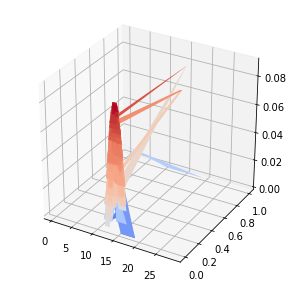

In [ ]:
z = proba_multi.reshape(307,1)
yval = yval.reshape(307, 1)
# tracer une distribution gaussienne multivariée
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection='3d')
    
ax.plot_surface(Xval, yval, z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()

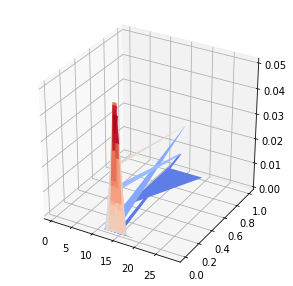

In [ ]:
z=yproba.reshape(307,1)
# tracer une distribution gaussiennes univariées
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection='3d')
    
ax.plot_surface(Xval, yval, z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()

# 4.Classification bayésienne


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#fractionner dataset (train-test)
x_train, x_test, y_train, y_test = train_test_split(Xval, yval, test_size = 0.20)

#instanciation
model_Gaussian = GaussianNB()

#training
model_Gaussian.fit(x_train, y_train)

#prédiction
prediction = model_Gaussian.predict(x_test)
print(prediction)

#evaluation du modèle
precision = accuracy_score(y_test, prediction)*100
print(precision)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
95.16129032258065


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Travail à faire
- 1) Nous aimerions bien choisir le epsilon, ceci est fait en analysant le score F1 obtenu precedenmment
- 2) nous aimerions appliquer une gaussienne multivariée à nos caracterisqtues; et comparer les deux résultats (multiplication des gaussiennes univariées, et gaussienne multivariée)
- 3) Nous aimerions visualiser en 3D la multiplication des gaussiennes univariées et la gaussienne multivariée pour comparaison. 
- 4) **** En Bonus - PAS obligatoire **** : nous aimerions utiliser la loi de Bayes afin de classifier nos exemples. Pour cela, voir le cours.


# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le Lundi 23 Mai 2022 à 22h


In [ ]:
# bonne chance